### 파이토치로 소프트맥스의 비용 함수 구현하기 (로우-레벨)

In [1]:
import torch
import torch.nn.functional as F

torch.manual_seed(1)

In [2]:
z = torch.FloatTensor([1, 2, 3])

In [3]:
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [4]:
hypothesis.sum()

tensor(1.)

In [5]:
z = torch.rand(3, 5, requires_grad=True)
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


In [6]:
y = torch.randint(5, (3,)).long()
print(y)

tensor([0, 2, 1])


In [9]:
# 원-핫 인코딩
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

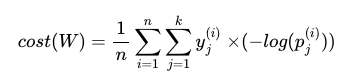

In [10]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


### 파이토치로 소프트맥스의 비용 함수 구현하기 (하이-레벨)

In [12]:
cost = (y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


In [13]:
# 원핫으로 안넣고 그냥 넣어도 됨 (y)
# nll -> Negative Log Likelihood
cost = F.nll_loss(F.log_softmax(z, dim=1), y)
print(cost)

tensor(1.4689, grad_fn=<NllLossBackward0>)


In [14]:
cost = F.cross_entropy(z, y)
cost

tensor(1.4689, grad_fn=<NllLossBackward0>)